<a href="https://colab.research.google.com/github/farghea/Pose-Detection-Biomechanics/blob/main/whiplash_rugby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yt-dlp
!apt-get install -y ffmpeg

import subprocess

def download_video(url, output_filename='myVideo.mp4'):
    temp_video = "temp_video.mp4"
    temp_audio = "temp_audio.m4a"

    command_video = f'yt-dlp -f "bestvideo[ext=mp4]" -o "{temp_video}" {url}'
    command_audio = f'yt-dlp -f "bestaudio[ext=m4a]" -o "{temp_audio}" {url}'
    command_merge = f'ffmpeg -i "{temp_video}" -i "{temp_audio}" -c copy "{output_filename}"'

    process_video = subprocess.Popen(command_video, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout_video, stderr_video = process_video.communicate()
    if process_video.returncode != 0:
        print("Error downloading video:")
        print(stderr_video.decode("utf-8"))
        return

    process_audio = subprocess.Popen(command_audio, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout_audio, stderr_audio = process_audio.communicate()
    if process_audio.returncode != 0:
        print("Error downloading audio:")
        print(stderr_audio.decode("utf-8"))
        return

    process_merge = subprocess.Popen(command_merge, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout_merge, stderr_merge = process_merge.communicate()
    if process_merge.returncode != 0:
        print("Error merging audio and video:")
        print(stderr_merge.decode("utf-8"))
    else:
        print(f"Video downloaded successfully as {output_filename}")

# Video URL
video_url = "https://www.youtube.com/watch?v=WjKv034IynI"

download_video(video_url, 'myVideo.mp4')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Video downloaded successfully as myVideo.mp4


In [ ]:
!pip install moviepy
!pip install imageio-ffmpeg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip

# Define start and end times in seconds
start_time = 3*60+52.3
end_time = 3*60+53.4

# Load the video
video = VideoFileClip("myVideo.mp4")

# Cut the video
clip = video.subclip(start_time, end_time)

# Save the video
clip.write_videofile("myclip.mp4")


Moviepy - Building video myclip.mp4.
MoviePy - Writing audio in myclipTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video myclip.mp4



Moviepy - Done !
Moviepy - video ready myclip.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = 'myclip.mp4'
video_file = open(video_path, 'rb')
video_bytes = video_file.read()
video_url = 'data:video/mp4;base64,' + b64encode(video_bytes).decode()
HTML(f'<video width=400 controls><source src="{video_url}" type="video/mp4"></video>')

In [ ]:
!mkdir frames


mkdir: cannot create directory ‘frames’: File exists


In [ ]:
import cv2
import os

# Open the video file
vidcap = cv2.VideoCapture('myclip.mp4')

# Read the first frame
success,image = vidcap.read()
frame_count = 0

# Loop through all frames in the video
while success:
    # Save the current frame as a JPG image
    cv2.imwrite("frames/frame%d.jpg" % frame_count, image)

    # Read the next frame
    success,image = vidcap.read()
    frame_count += 1


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

model = hub.load('https://bit.ly/metrabs_l')  # Takes about 3 minutes


In [ ]:
all_predictions = []
all_images = []
for i in range(frame_count):
  file_path = os.path.join('frames', 'frame%d.jpg' %i)
  print(file_path)
  img = tf.image.decode_image(tf.io.read_file(file_path))
  all_images.append(img)
  pred = model.detect_poses(img, skeleton='smpl+head_30')
  all_predictions.append(pred)


frames/frame0.jpg
frames/frame1.jpg
frames/frame2.jpg
frames/frame3.jpg
frames/frame4.jpg
frames/frame5.jpg
frames/frame6.jpg
frames/frame7.jpg
frames/frame8.jpg
frames/frame9.jpg
frames/frame10.jpg
frames/frame11.jpg
frames/frame12.jpg
frames/frame13.jpg
frames/frame14.jpg
frames/frame15.jpg
frames/frame16.jpg
frames/frame17.jpg
frames/frame18.jpg
frames/frame19.jpg
frames/frame20.jpg
frames/frame21.jpg
frames/frame22.jpg
frames/frame23.jpg
frames/frame24.jpg
frames/frame25.jpg
frames/frame26.jpg
frames/frame27.jpg


In [ ]:
import matplotlib.pyplot as plt
def plot_results(image, pred, joint_names, joint_edges):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.patches import Rectangle
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image.numpy())
    for x, y, w, h, c in pred['boxes'].numpy():
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -75)
    pose_ax.set_xlim3d(-1500-700, 1500+700)
    pose_ax.set_zlim3d(-1500-500, 1500+500)
    pose_ax.set_ylim3d(2000, 5000)
    pose_ax.set_xlabel('x')
    pose_ax.set_ylabel('y')
    pose_ax.set_zlabel('z')
    poses3d = pred['poses3d'].numpy()
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, pred['poses2d'].numpy()):
        for i_start, i_end in joint_edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

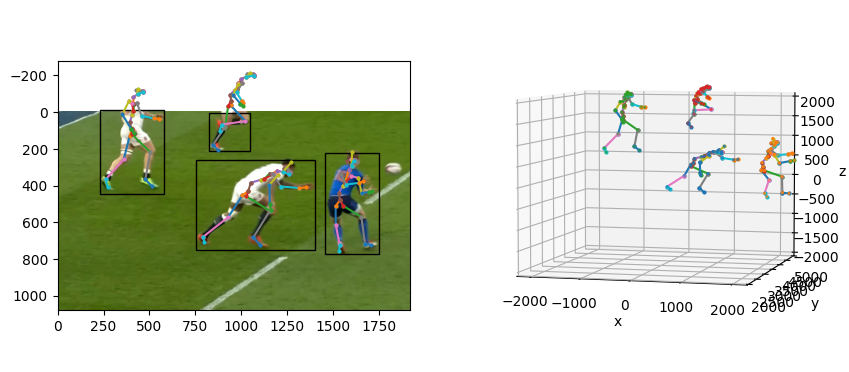

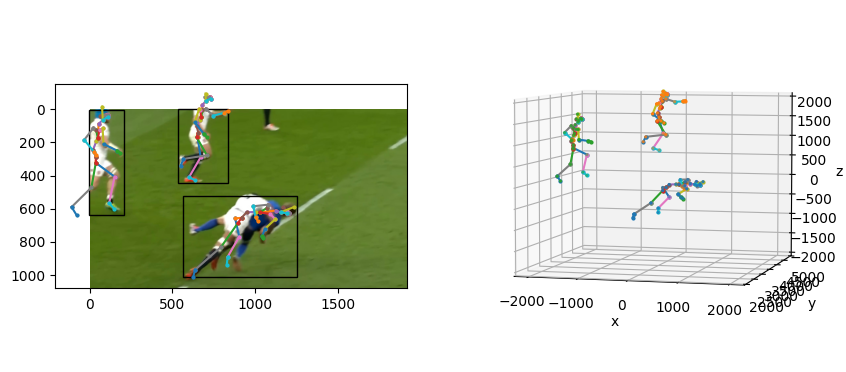

In [ ]:
joint_names = model.per_skeleton_joint_names['smpl+head_30'].numpy().astype(str)
joint_edges = model.per_skeleton_joint_edges['smpl+head_30'].numpy()

for i in [0, frame_count - 1]:
  img = all_images[i]
  pred = all_predictions[i]
  plot_results(img, pred, joint_names, joint_edges)

  plt.savefig('subplot_plot_rogby_'+str(i)+'.svg', format='svg', dpi=600)


